# University of Stirling

# ITNPBD2 Representing and Manipulating Data

# Assignment Autumn 2025

# A Consultancy Job for JC Penney

# Business understanding

In [1]:
# problem addressing/insights - relationship between state and spending; relationship between
# age and category/department; relationship between review and brand; relationship between numerical & written review? (sentinent analysis week 9)

In [ ]:
# explain understanding of unique ID/SKU etc

# Data understanding and preparation

In [1]:
# put all imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import plotly.graph_objects as go
import pandas as pd

# import json
# import seaborn

# -- 'products_csv' data set

In [238]:
# This data set contains the unique id (of purchase), item SKU, item name, item description, price, average score 
# index has not been assigned at this stage
# Columns look appropriate so none have been removed
products_csv = pd.read_csv('products.csv')
print("Rows, columns:", products_csv.shape)
products_csv.head()

Rows, columns: (7982, 6)


,Uniq_id,SKU,Name,Description,Price,Av_Score
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.000
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
3,505e6633d81f2cb7400c0cfa0394c427,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.500
4,d969a8542122e1331e304b09f81a83f6,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.125


In [252]:
# look at the types of data contained within the columns - all appear appropriate
# Check for any missing values in data set - indicates missing values in 'description' and 'price' columns
print("Datatypes:", "\n", products_csv.dtypes, "\n")
print("Missing data:", "\n", products_csv.isna().sum())

Datatypes: 
 Uniq_id         object
SKU             object
Name            object
Description     object
Price          float64
Av_Score       float64
dtype: object 

Missing data: 
 Uniq_id           0
SKU              67
Name              0
Description     543
Price          2166
Av_Score          0
dtype: int64


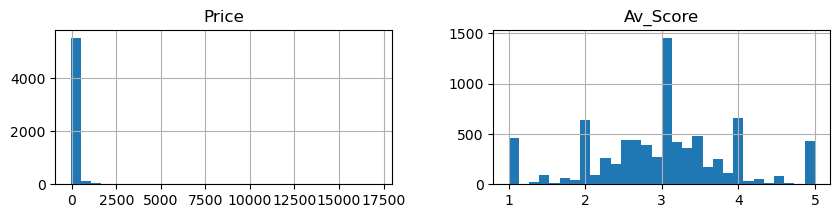

In [69]:
# visualise the distribution of numeric variables in dataset. Histogram subplot per column
# av_score hist - shows distribution of numerical scores between 1-5
# price hist - suggests very small amounts of data exist along x-axis but not visible on this plot
# suggest outliers and something wrong? look at price:
# left scew of 'Price' histogram suggests outliers >2500
products_csv.hist(figsize=(10,2), bins=30)
plt.show()

In [70]:
# table representation of hist - shows spread of price - many items with individual
# price - not unexpected given it is a retail website - data likely well represented. However, left skew of histogram suggests outliers >2500
# products_csv['Price'].value_counts()

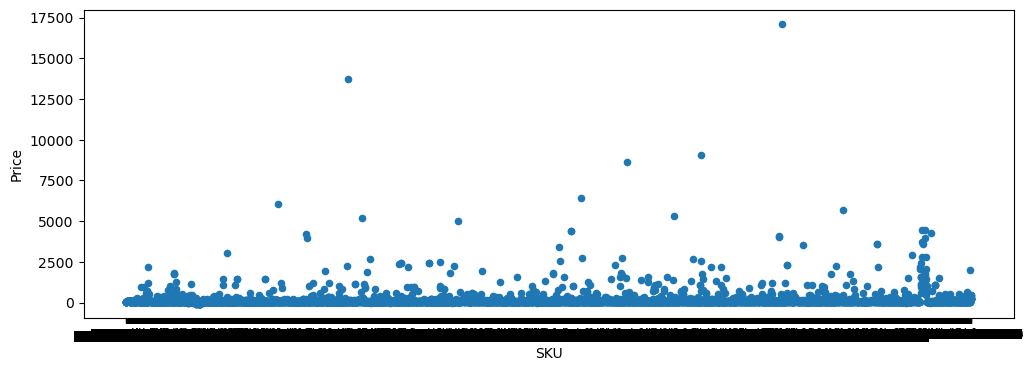

In [71]:
# scatter plot to show all points
# shows majority prices below 2500 with few high outliers + some negative price values.
products_csv['SKU'] = products_csv['SKU'].astype(str)
products_csv.plot(kind='scatter', y='Price', x='SKU', figsize=(12,4))
plt.show()

In [276]:
# this shows that all the SKUs with negative price are brand 'Xersion' - it is displayed as first 5 rows now, but extending this shows all 'Xersion' brand.
#running the following code: 'products_csv[products_csv['Price']<0]['Name'].value_counts()' shows total count  
#Displays all negative price points have 'Name' = 'Xersion' I cannot ask the client here (JCPenney), but a google search shows 'Xersion' to be a brand
# of 'Activewear & Workout clothes stocked by JCPenney. Negative values - susggests something went wrong with the payment 
# process? Or defect in pricing system?
# shows that there are few (44) faulty data points in this data set
# I have decided to delete these negative values - will not help insights and likely confuse. Note there is still a Av Score assigned to these? refund?

print("Rows, columns:", products_csv[products_csv['Price']<0].shape)
products_csv[products_csv['Price']<0].head()

Rows, columns: (44, 6)


,Uniq_id,SKU,Name,Description,Price,Av_Score
587,af49185dcfd709b8a21f1b2fdf408cb9,pp5006510551,Xersion™ Go Swiftly Vest - Plus,Wear our vest for exercise or errands. It feat...,-65.27,1.600000
588,d98546105db42d9fb4b3d5f1ff0c1b3b,pp5006380890,Xersion™ Graphic Leggings - Tall,A splash of graphic excitement takes our Xersi...,-58.01,2.000000
589,d2cef6ebd8a99bf7aa7d1d7bc0583c06,pp5006380890,Xersion™ Graphic Leggings - Tall,A splash of graphic excitement takes our Xersi...,-58.01,5.000000
590,7ab9a41c73121f0c90b4641fe906f62e,pp5006380890,Xersion™ Graphic Leggings - Tall,A splash of graphic excitement takes our Xersi...,-58.01,4.000000
592,aae74d7df3f8247302ff4a8bed07fa96,pp5006350688,Xersion™ Graphic Tank Top - Girls 7-16 and Plus,"With bright color and easy comfort, this tank ...",-21.76,2.777778


In [277]:
# any prices = 0? This confirms that there are no transactions equal to '0'
print(products_csv[products_csv['Price']==0].shape)

(0, 6)


In [278]:
# View products with very high values to check true data
# shows combination furniture etc and jewlery - would expect high price point - data likely true - keep this data
print("Rows", products_csv[products_csv['Price']>2500]['Name'].value_counts().shape)
products_csv[products_csv['Price']>2500]['Name'].value_counts().head()

Rows (34,)


Name
LG ENERGY STAR® 28 cu. ft. Ultra Capacity 3-Door French Door Refrigerator With Door-in-Door™ Design    2
Samsung ENERGY STAR® 29 cu. ft. 36” Wide Side-by-Side Refrigerator with Food ShowCase Fridge Door      2
Infinite Gold™ Mens 14K Yellow Gold 22 Hollow Curb Chain Necklace                                      2
Fabric Possibilities Roll-Arm 2-pc. Right-Arm Chaise/Loveseat Sectional                                1
1½ CT. Round Certified Diamond Solitaire 14K Yellow Gold Ring                                          1
Name: count, dtype: int64

In [279]:
# new variable created which removes all price points below zero & those with missing price data in description - this accounts for the reduction in rows >44 ?are you better substituting with 
# NAN here to keep Av_Score or do we remove as missing data?
# below code shows total rows in new clean data set and rechecks for missing data in set, confirms no missing data.
products_csvclean = products_csv[products_csv['Price']>=0]
print("Original data set rows, columns:", products_csv.shape)
print("Cleaned data set rows, columns:", products_csvclean.shape)
print("Check for missing data:", '\n', products_csvclean.isna().sum())

Original data set rows, columns: (7982, 6)
Cleaned data set rows, columns: (5772, 6)
Check for missing data: 
 Uniq_id         0
SKU            49
Name            0
Description     0
Price           0
Av_Score        0
dtype: int64


In [280]:
# create new variable containing copy of products_csvclean for use in analysis
# this new variable does not contain any rows with missing data or price<0.
products_csvready = products_csvclean.copy()
#products_csvready.head()

# -- 'reviews_csv' data set

In [10]:
# this data set contains the unique purchase ID, the customer username, the numerical score assigned by the customer and their written review.
# note index is default currently
# note the unique id in products_csv & review_csv match - same customer data - join this? Check for duplicate usernames - repeat users?
# The columns all look relevant so none will be removed
reviews_csv = pd.read_csv('reviews.csv')
print("Rows, columns:", reviews_csv.shape)
reviews_csv.head()

Rows, columns: (39063, 4)


,Uniq_id,Username,Score,Review
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,2,You never have to worry about the fit...Alfred...
1,b6c0b6bea69c722939585baeac73c13d,krpz1113,1,Good quality fabric. Perfect fit. Washed very ...
2,b6c0b6bea69c722939585baeac73c13d,mbmg3241,2,I do not normally wear pants or capris that ha...
3,b6c0b6bea69c722939585baeac73c13d,zeqg1222,0,I love these capris! They fit true to size and...
4,b6c0b6bea69c722939585baeac73c13d,nvfn3212,3,This product is very comfortable and the fabri...


In [253]:
# shows the data types in the data set - appear appropriate
# look for any missing values - shows no missing values in data set - very good.
# no further data cleaning/preparation required in this dataset 
print("Datatypes:", "\n", reviews_csv.dtypes, "\n")
print("Missing data:", "\n", reviews_csv.isna().sum())

Datatypes: 
 Uniq_id     object
Username    object
Score        int64
Review      object
dtype: object 

Missing data: 
 Uniq_id     0
Username    0
Score       0
Review      0
dtype: int64


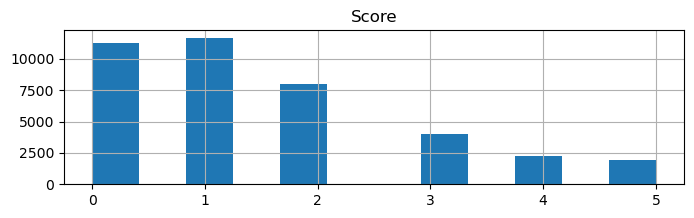

In [281]:
# this histogram shows the distribution of numerical scores - note scores can be intergers
reviews_csv.hist(figsize=(8,2), bins=12)
plt.show()

In [14]:
# RELEVANCE?
# shows there are no scores outwith the expected range
print(reviews_csv[reviews_csv['Score']<0].shape)
print(reviews_csv[reviews_csv['Score']>5].shape)

(0, 4)
(0, 4)


In [43]:
#shows the number of reviews for each score between 0-5, with 1/5 being the most common score
# does this grading system work with '0' as highest score or lowest?

In [282]:
# create new variable containing copy of products_csvclean for use in analysis
reviews_csvready = reviews_csv.copy()
#reviews_csvready.head()

# -- users_csv data set

In [297]:
# This data set contains the customer username, their DOB, and their state.
users_csv = pd.read_csv('users.csv')
print("Rows, columns:", users_csv.shape)
users_csv.head()

Rows, columns: (5000, 3)


,Username,DOB,State
0,bkpn1412,31.07.1983,Oregon
1,gqjs4414,27.07.1998,Massachusetts
2,eehe1434,08.08.1950,Idaho
3,hkxj1334,03.08.1969,Florida
4,jjbd1412,26.07.2001,Georgia


In [298]:
# here there is no numerical data, I will check for missing data & data types
print("Datatypes:", "\n", users_csv.dtypes, "\n") # displays data types present
print("Missing data:", "\n", users_csv.isna().sum()) # shows no missing data which is good

Datatypes: 
 Username    object
DOB         object
State       object
dtype: object 

Missing data: 
 Username    0
DOB         0
State       0
dtype: int64


In [299]:
users_csv['DOB'] = pd.to_datetime(users_csv['DOB'], dayfirst=True) # coverted DOB column to datetime format, using day rather than month first
print(users_csv.dtypes)

Username            object
DOB         datetime64[ns]
State               object
dtype: object


In [300]:
users_csv['DOB_Year'] = users_csv['DOB'].dt.year # split DOB to get year - will want to categorise customers by year of birth for analysis.
display(users_csv.head())

,Username,DOB,State,DOB_Year
0,bkpn1412,1983-07-31,Oregon,1983
1,gqjs4414,1998-07-27,Massachusetts,1998
2,eehe1434,1950-08-08,Idaho,1950
3,hkxj1334,1969-08-03,Florida,1969
4,jjbd1412,2001-07-26,Georgia,2001


In [301]:
#check for duplicate users? as this could skew data looking at customer distribution in states
# this shows username 'dqft3311' is used twice, with different D.O.B and state. Depending on the analysis I would like to run, this duplicate
# could be confusing - removing one data entry is unlikely to impact the overall analysis.
duplicate = users_csv['Username'].duplicated(keep=False)
print(users_csv[duplicate])

      Username        DOB       State  DOB_Year
731   dqft3311 1995-07-28   Tennessee      1995
2619  dqft3311 1969-08-03  New Mexico      1969


In [302]:
users_csv.drop(731, inplace=True) ## remove data rows with duplicate username, removed by index

In [303]:
users_csv.drop(2619, inplace=True)

In [304]:
# CHANGE THIS TO BETTER IDENTIFIER THAN 'FALSE'
users_csv['Username'].duplicated().value_counts() #Confirms no longer rows with duplicate username in the dataset.

Username
False    4998
Name: count, dtype: int64

In [305]:
# add column showing abbreviations for states, abbreviations for choropleth USA from https://pe.usps.com/text/pub28/28apb.htm on 07.11.2025.
State_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL',
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'American Samoa': 'AS', 'Guam': 'GU', 'Northern Mariana Islands': 'MP', 'Puerto Rico': 'PR', 'Virgin Islands': 'VI'
}

In [308]:
users_csv['State_abbr'] = users_csv['State'].map(State_abbr) # Map state abbreviations column to the original 'State' column
display(users_csv.head())

,Username,DOB,State,DOB_Year,State_abbr
0,bkpn1412,1983-07-31,Oregon,1983,OR
1,gqjs4414,1998-07-27,Massachusetts,1998,MA
2,eehe1434,1950-08-08,Idaho,1950,ID
3,hkxj1334,1969-08-03,Florida,1969,FL
4,jjbd1412,2001-07-26,Georgia,2001,GA


In [341]:
users_csvready = users_csv.copy() # create new variable containing copy of products_csvclean for use in analysis
#users_csvready.head()

# -- 'jcpenney_prods' data set

In [309]:
# this data set contains.... 
# remove some of these columns - sale_price? Category tree?
# missing values, duplicate data, incorrect data types, outliers & anomalies
jcpenney_prods = pd.read_json('jcpenney_products.json', lines=True)
print("Rows, columns):", jcpenney_prods.shape)
jcpenney_prods.head()

Rows, columns): (7982, 15)


,uniq_id,sku,name_title,description,list_price,sale_price,category,category_tree,average_product_rating,product_url,product_image_urls,brand,total_number_reviews,Reviews,Bought With
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'fsdv4141', 'Review': 'You never hav...","[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567..."
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,3.000,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'tpcu2211', 'Review': 'You never hav...","[bc9ab3406dcaa84a123b9da862e6367d, 18eb69e8fc2..."
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,view all,jcpenney|women|view all,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'pcfg3234', 'Review': 'You never hav...","[3ce70f519a9cfdd85cdbdecd358e5347, b0295c96d2b..."
3,505e6633d81f2cb7400c0cfa0394c427,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,view all,jcpenney|women|view all,3.500,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'ngrq4411', 'Review': 'You never hav...","[efcd811edccbeb5e67eaa8ef0d991f7c, 7b2cc00171e..."
4,d969a8542122e1331e304b09f81a83f6,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,view all,jcpenney|women|view all,3.125,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'nbmi2334', 'Review': 'You never hav...","[0ca5ad2a218f59eb83eec1e248a0782d, 9869fc8da14..."


In [310]:
# remove column# remove columns that I do not need for analysis objectives that I do not need for analysis objectives
jcpenney_prods = jcpenney_prods[['uniq_id', 'sku', 'name_title', 'list_price', 'category', 'average_product_rating', 'product_url', 'product_image_urls', 'brand', 'total_number_reviews', 'Reviews']]

In [311]:
jcpenney_prods.head() # showing with only required columns 

,uniq_id,sku,name_title,list_price,category,average_product_rating,product_url,product_image_urls,brand,total_number_reviews,Reviews
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,41.09,alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'fsdv4141', 'Review': 'You never hav..."
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,41.09,alfred dunner,3.000,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'tpcu2211', 'Review': 'You never hav..."
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,41.09,view all,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'pcfg3234', 'Review': 'You never hav..."
3,505e6633d81f2cb7400c0cfa0394c427,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,41.09,view all,3.500,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'ngrq4411', 'Review': 'You never hav..."
4,d969a8542122e1331e304b09f81a83f6,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,41.09,view all,3.125,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'nbmi2334', 'Review': 'You never hav..."


In [312]:
jcpenney_prods.dtypes # to see hist of 'list price' I will need to change the data type to numerical. The rest of the data types are appropriate.

uniq_id                    object
sku                        object
name_title                 object
list_price                 object
category                   object
average_product_rating    float64
product_url                object
product_image_urls         object
brand                      object
total_number_reviews        int64
Reviews                    object
dtype: object

In [313]:
jcpenney_prods['list_price'] = jcpenney_prods['list_price'].replace('', np.nan) #change datatype of 'list_price'
jcpenney_prods['list_price'] = jcpenney_prods['list_price'].astype(float)

In [314]:
print("Datatypes:", "\n", jcpenney_prods.dtypes, "\n") # displays data types present
print("Missing data:", "\n", jcpenney_prods.isna().sum()) # # to check for missing values - exist in 'list_price' row - decide if want to remove these to clean data set

Datatypes: 
 uniq_id                    object
sku                        object
name_title                 object
list_price                float64
category                   object
average_product_rating    float64
product_url                object
product_image_urls         object
brand                      object
total_number_reviews        int64
Reviews                    object
dtype: object 

Missing data: 
 uniq_id                      0
sku                          0
name_title                   0
list_price                2166
category                     0
average_product_rating       0
product_url                  0
product_image_urls           0
brand                        0
total_number_reviews         0
Reviews                      0
dtype: int64


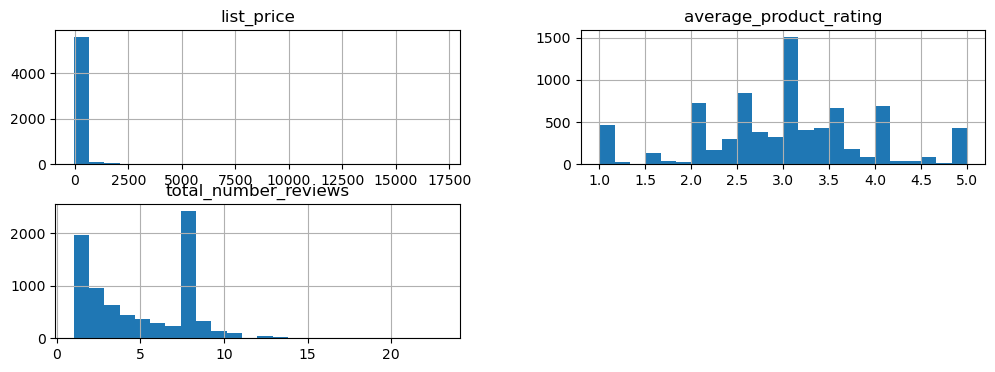

In [315]:
jcpenney_prods.hist(figsize=(12,4), bins=24) # displays numerical values in histogram to visualise data
plt.show()

(22, 11)


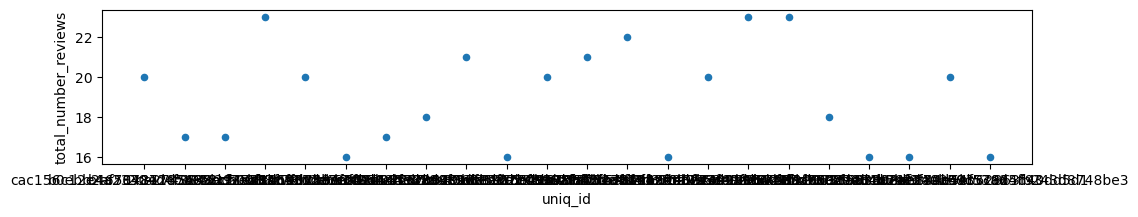

In [38]:
# the extension of the x-axis in the 'total number of reviews' histograph suggests data points are present but very small volume - look into these 
# to assess if true points or outliers/anomalies
# shows total number of reviews that are >15
print(jcpenney_prods[jcpenney_prods['total_number_reviews']>15].shape)
jcpenney_prods[jcpenney_prods['total_number_reviews']>15].plot(kind='scatter', y='total_number_reviews', x='uniq_id', figsize=(12,2))
plt.show()

In [316]:
# confirms these outliers are genuine results, just have unusually high number of reviews
print("Rows, columns:", jcpenney_prods[jcpenney_prods['total_number_reviews']>15].shape)
jcpenney_prods[jcpenney_prods['total_number_reviews']>15].head()

Rows, columns: (22, 11)


,uniq_id,sku,name_title,list_price,category,average_product_rating,product_url,product_image_urls,brand,total_number_reviews,Reviews
273,cac156c12e4a23304d4c1912cf7eb37f,pp5005840398,St. John's Bay® Secretly Slender Straight-Leg ...,NaN,view all,2.900000,http://www.jcpenney.com/st-johns-bay-secretly-...,http://s7d2.scene7.com/is/image/JCPenney/DP070...,St. John's Bay,20,"[{'User': 'zsje4241', 'Review': 'disappointed...."
580,b0ebb2af70787285699ec500f2d69312,pp5003162937,Dirt Devil® Vigor Cyclonic Pet Bagless Upright...,181.29,laundry & cleaning,2.529412,http://www.jcpenney.com/dirt-devil-vigor-cyclo...,http://s7d9.scene7.com/is/image/JCPenney/DP081...,Dirt Devil,17,"[{'User': 'zuwp1111', 'Review': 'Switching to ..."
983,b465848a1d7465ccf75aba6515de7c6d,pp5005180334,SEPHORA COLLECTION Flatter Yourself Contouring...,NaN,face makeup,2.705882,http://www.jcpenney.com/sephora-collection-fla...,http://s7d2.scene7.com/is/image/JCPenney/DP022...,SEPHORA COLLECTION,17,"[{'User': 'qqsn2121', 'Review': 'I bought this..."
1186,2ce274384d293748bbf8bdebbc0aa145,pp5006200106,Liz Claiborne® Bermuda Shorts,45.93,bermuda,2.826087,http://www.jcpenney.com/liz-claiborne-bermuda-...,http://s7d2.scene7.com/is/image/JCPenney/DP091...,LIZ CLAIBORNE,23,"[{'User': 'cjcm1343', 'Review': 'I checked at ..."
1753,f5638dca1688c7fd73bef1f8608b5d1a,pp5005840398,St. John's Bay® Secretly Slender Straight-Leg ...,NaN,st. john's bay,2.500000,http://www.jcpenney.com/st-johns-bay-secretly-...,http://s7d2.scene7.com/is/image/JCPenney/DP070...,St. John's Bay,20,"[{'User': 'wknc4212', 'Review': 'disappointed...."


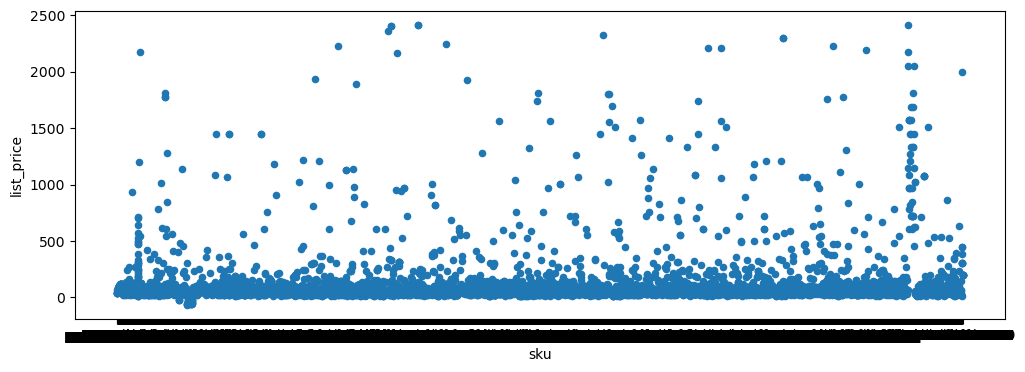

In [40]:
# the extension of the x-axis in the 'list price' histograph suggests data points are present but very small volume above 2500 - look into these 
# to assess if true points or outliers/anomalies
# shows the majority of list prices are <2500 with a few high outliers, and possibly some negative values
jcpenney_prods[jcpenney_prods['list_price']<2500].plot(kind='scatter', y='list_price', x='sku', figsize=(12,4))
plt.show()

(44, 11)


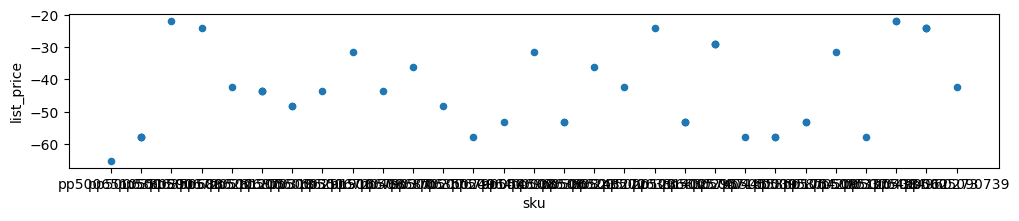

In [41]:
# confirms existance of list prices<0 
print(jcpenney_prods[jcpenney_prods['list_price']<0].shape)
jcpenney_prods[jcpenney_prods['list_price']<0].plot(kind='scatter', y='list_price', x='sku', figsize=(12,2))
plt.show()

In [318]:
# as products_csv data set - all negative list_price are of brand 'Xersion' - would require discussion with client to establish pricing stategy etc 
# as very few lines relatively, will remove from the data set for analysis.
# is there an insight here? #- also 44 - will this be the same as in prods_csv data set?
jcpenney_prods[jcpenney_prods['list_price']<0]['name_title'].value_counts().head()

name_title
Xersion™ Quick-Dri Short-Sleeve Melange Tee              3
Xersion™ Lincoln Quick-Dri Capris - Tall                 3
Xersion™ Printed 3/4-Length Compression Slider Shorts    3
Xersion™ Print Compression Capris                        3
Xersion™ Graphic Leggings - Tall                         3
Name: count, dtype: int64

In [319]:
# new variable created with all price points below zero & unwanted data columns removed & correct data types present
jcpenney_prodsclean = jcpenney_prods[jcpenney_prods['list_price']>=0]
print("Rows, columns:", jcpenney_prodsclean.shape)

Rows, columns: (5772, 11)


In [320]:
# create new variable containing copy of products_csvclean for use in analysis
jcpenney_prodsready = jcpenney_prodsclean.copy()
#jcpenney_prodsready.head()

# -- jcpenney_rev data set

Remove most of the data prep/clean for this data set and explain that did not utilise in analysis based on not needed?

In [321]:
# this data set contains...
# missing values, duplicate data, incorrect data types, outliers & anomalies
# note the 'username' has been removed as the index - maybe don't create the username as the index until analysis?
jcpenney_rev = pd.read_json('jcpenney_reviewers.json', lines=True)
print("Rows, columns:", jcpenney_rev.shape)
jcpenney_rev.head()

Rows, columns: (5000, 4)


,Username,DOB,State,Reviewed
0,bkpn1412,31.07.1983,Oregon,[cea76118f6a9110a893de2b7654319c0]
1,gqjs4414,27.07.1998,Massachusetts,[fa04fe6c0dd5189f54fe600838da43d3]
2,eehe1434,08.08.1950,Idaho,[]
3,hkxj1334,03.08.1969,Florida,"[f129b1803f447c2b1ce43508fb822810, 3b0c9bc0be6..."
4,jjbd1412,26.07.2001,Georgia,[]


In [322]:
print("Datatypes:", "\n", jcpenney_rev.dtypes, "\n") # displays data types present
print("Missing data:", "\n", jcpenney_rev.isna().sum()) # # to check for missing values 

Datatypes: 
 Username    object
DOB         object
State       object
Reviewed    object
dtype: object 

Missing data: 
 Username    0
DOB         0
State       0
Reviewed    0
dtype: int64


In [323]:
# DO YOU USE THIS DATASET? IF NOT CAN EXCLUDE FROM DATA PREP AND JUST EXPLAIN BRIEFLY
# coverted DOB column to datetime format, using day rather than month first
jcpenney_rev['DOB'] = pd.to_datetime(jcpenney_rev['DOB'], dayfirst=True)
print(jcpenney_rev.dtypes)

Username            object
DOB         datetime64[ns]
State               object
Reviewed            object
dtype: object


In [324]:
## split DOB to get year - will want to categorise customers by year of birth for analysis.
jcpenney_rev['DOB_Year'] = jcpenney_rev['DOB'].dt.year
display(jcpenney_rev.head())

,Username,DOB,State,Reviewed,DOB_Year
0,bkpn1412,1983-07-31,Oregon,[cea76118f6a9110a893de2b7654319c0],1983
1,gqjs4414,1998-07-27,Massachusetts,[fa04fe6c0dd5189f54fe600838da43d3],1998
2,eehe1434,1950-08-08,Idaho,[],1950
3,hkxj1334,1969-08-03,Florida,"[f129b1803f447c2b1ce43508fb822810, 3b0c9bc0be6...",1969
4,jjbd1412,2001-07-26,Georgia,[],2001


In [51]:
# add column showing abbreviations for states, abbreviations for choropleth USA from https://pe.usps.com/text/pub28/28apb.htm on 07.11.2025.
State_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL',
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'American Samoa': 'AS', 'Guam': 'GU', 'Northern Mariana Islands': 'MP', 'Puerto Rico': 'PR', 'Virgin Islands': 'VI'
}

In [52]:
# Map state abbreviations column to the original 'State' column
jcpenney_rev['State_abbr'] = jcpenney_rev['State'].map(State_abbr)
display(jcpenney_rev.head())

,Username,DOB,State,Reviewed,DOB_Year,State_abbr
0,bkpn1412,1983-07-31,Oregon,[cea76118f6a9110a893de2b7654319c0],1983,OR
1,gqjs4414,1998-07-27,Massachusetts,[fa04fe6c0dd5189f54fe600838da43d3],1998,MA
2,eehe1434,1950-08-08,Idaho,[],1950,ID
3,hkxj1334,1969-08-03,Florida,"[f129b1803f447c2b1ce43508fb822810, 3b0c9bc0be6...",1969,FL
4,jjbd1412,2001-07-26,Georgia,[],2001,GA


In [53]:
#suggests one duplicated username, I have choosen username to check because this should be a unique identifier
jcpenney_rev['Username'].duplicated().value_counts()

Username
False    4999
True        1
Name: count, dtype: int64

In [54]:
# this shows username 'dqft3311' is used twice, with different D.O.B and state. Depending on the analysis I would like to run, this duplicate
# could be confusing - removing one data entry is unlikely to impact the overall analysis. This is the same as the csv file duplicate.
duplicate2 = jcpenney_rev['Username'].duplicated(keep=False)
print(jcpenney_rev[duplicate2])

      Username        DOB       State                            Reviewed  \
731   dqft3311 1995-07-28   Tennessee  [5f280fb338485cfc30678998a42f0a55]   
2619  dqft3311 1969-08-03  New Mexico  [571b86d307f94e9e8d7919b551c6bb52]   

      DOB_Year State_abbr  
731       1995         TN  
2619      1969         NM  


In [55]:
# removed duplicate username in rows by index
jcpenney_rev.drop(731, inplace=True)

In [56]:
jcpenney_rev.drop(2619, inplace=True)

In [57]:
# confirms no duplicate usernames remain in dataset
jcpenney_rev['Username'].duplicated().value_counts()

Username
False    4998
Name: count, dtype: int64

In [58]:
# create new variable containing copy of products_csvclean for use in analysis
jcpenney_revready = jcpenney_rev.copy()
jcpenney_revready.head()

,Username,DOB,State,Reviewed,DOB_Year,State_abbr
0,bkpn1412,1983-07-31,Oregon,[cea76118f6a9110a893de2b7654319c0],1983,OR
1,gqjs4414,1998-07-27,Massachusetts,[fa04fe6c0dd5189f54fe600838da43d3],1998,MA
2,eehe1434,1950-08-08,Idaho,[],1950,ID
3,hkxj1334,1969-08-03,Florida,"[f129b1803f447c2b1ce43508fb822810, 3b0c9bc0be6...",1969,FL
4,jjbd1412,2001-07-26,Georgia,[],2001,GA


In [ ]:
# just need to confirm final variable name of 'cleaned' data sets then start analysis.
# things to include - pandas joins; reading reviews in json file; at least one type of visualisation; USA map; is there a way to get total sales? 
# most popular brands based on rating?

# Data Analysis/Insights

# Goals of analysis: 
1. map of USA states showing density of users per state - areas to focus on? store distribution/awareness of brand?
2. relationship between age category and density of online users - are all age catefories being utilised/are there areas can improve
3. which products/brands are most successful according to customer reviews (score), can drill down into these to see reviews and implement success onto other brands/irems, use as benchmark
4. do written reviews shed anly light on lowest scoring products that can be actioned on. actally revealed mismatch between score & review on basis of 'positive' & 'negative' words...
5. incidental insights: Xersion & negative pricing; 


# Insigt 1: map of USA showing density of users

In [325]:
import plotly.graph_objects as go
import pandas as pd

In [326]:
# show density of users per state 
# need to create variable that assigns users per state
users_per_state = users_csvready.groupby('State_abbr')['Username'].count().reset_index(name='User Count')
display(users_per_state.head())

,State_abbr,User Count
0,AK,94
1,AL,95
2,AR,92
3,AS,86
4,AZ,71


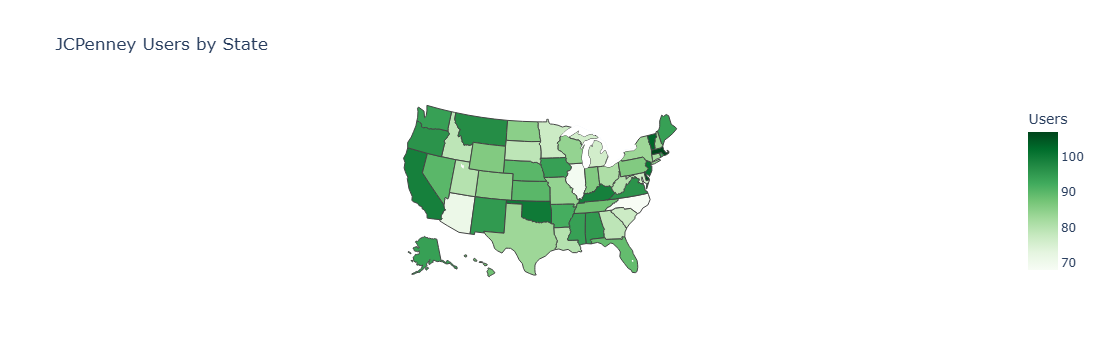

In [372]:
# create graph, when hover over states shows user density in number
fig_USA = go.Figure(
    data=go.Choropleth(locations=users_per_state['State_abbr'],
    z=users_per_state['User Count'].astype(float), locationmode = 'USA-states', colorscale = 'Greens', colorbar_title = 'Users'))
fig_USA.update_layout(title_text = 'JCPenney Users by State', geo_scope='usa')
fig_USA.show()

# Insight 2: Bar plot showing brands with over 5 items with a 5 score review

In [328]:
# data from jcpenney_prodsready
extracted_databrand = jcpenney_prodsready[['name_title', 'average_product_rating', 'brand']]
display(extracted_databrand.head())

,name_title,average_product_rating,brand
0,Alfred Dunner® Essential Pull On Capri Pant,2.625,Alfred Dunner
1,Alfred Dunner® Essential Pull On Capri Pant,3.000,Alfred Dunner
2,Alfred Dunner® Essential Pull On Capri Pant,2.625,Alfred Dunner
3,Alfred Dunner® Essential Pull On Capri Pant,3.500,Alfred Dunner
4,Alfred Dunner® Essential Pull On Capri Pant,3.125,Alfred Dunner


In [330]:
# above data displaying overall average score
average_score_per_namebrand = extracted_databrand.groupby(['name_title', 'brand'])['average_product_rating'].mean().reset_index()
average_score_per_namebrand.rename(columns={'average_product_rating': 'Overall_Av_Score'}, inplace=True)
print("Rows, columns:", average_score_per_namebrand.shape)
display(average_score_per_namebrand.head())

Rows, columns: (4304, 3)


,name_title,brand,Overall_Av_Score
0,1 CT. Certified Diamond Solitaire Ring,MODERN BRIDE,2.666667
1,1 CT. T.W. Certified Diamond 14K White Gold Br...,MODERN BRIDE,4.000000
2,1 CT. T.W. Certified Diamond 14K White Gold Pr...,MODERN BRIDE,5.000000
3,1 CT. T.W. Certified Diamond 14K Yellow Gold B...,MODERN BRIDE,4.000000
4,1 CT. T.W. Diamond 10K White Gold Cluster Ring,MODERN BRIDE,1.000000


In [331]:
# These are the top Named products with average score 5/5
av_scorebrand5 = average_score_per_namebrand[average_score_per_namebrand['Overall_Av_Score']==5]
print("Rows, columns:", av_scorebrand5.shape)
print(av_scorebrand5.head())

Rows, columns: (239, 3)
                                           name_title         brand  \
2   1 CT. T.W. Certified Diamond 14K White Gold Pr...  MODERN BRIDE   
8              1 CT. T.W. Diamond Ring 10K White Gold  MODERN BRIDE   
11  1/2 CT. T.W. Black & White Diamond Ring Sterli...  MODERN BRIDE   
14          1/2 CT. T.W. Diamond Bridal Ring 10K Gold  MODERN BRIDE   
27  10K White Gold Genuine Aquamarine & Lab-Create...  FINE JEWELRY   

    Overall_Av_Score  
2                5.0  
8                5.0  
11               5.0  
14               5.0  
27               5.0  


In [332]:
# this shows the most common brands to have items with rating 5/5
inn = av_scorebrand5['brand'].value_counts().reset_index(name='value')
display(inn.head())

,brand,value
0,FINE JEWELRY,17
1,Asstd National Brand,15
2,ARIZONA,10
3,LIZ CLAIBORNE,7
4,A.N.A,6


In [66]:
# this shows the the brands with more than 5 items with average score 5/5
final = inn[inn['value']>5]
print("row, column:", final.shape)
display(final)

row, column: (6, 2)


,brand,value
0,FINE JEWELRY,17
1,Asstd National Brand,15
2,ARIZONA,10
3,LIZ CLAIBORNE,7
4,A.N.A,6
5,MODERN BRIDE,6


In [333]:
# filter for items of these top 5 brands
top_5_brands = av_scorebrand5[av_scorebrand5['brand'].isin(['FINE JEWELRY', 'Asstd National Brand', 'ARIZONA', 'LIZ CLAIBORNE','A.N.A', 'MODERN BRIDE'])]
print(top_5_brands.shape)
display(top_5_brands.head())

(61, 3)


,name_title,brand,Overall_Av_Score
2,1 CT. T.W. Certified Diamond 14K White Gold Pr...,MODERN BRIDE,5.0
8,1 CT. T.W. Diamond Ring 10K White Gold,MODERN BRIDE,5.0
11,1/2 CT. T.W. Black & White Diamond Ring Sterli...,MODERN BRIDE,5.0
14,1/2 CT. T.W. Diamond Bridal Ring 10K Gold,MODERN BRIDE,5.0
27,10K White Gold Genuine Aquamarine & Lab-Create...,FINE JEWELRY,5.0


In [335]:
# produce data needed for topline bar plot
barplot = top_5_brands['brand'].value_counts().reset_index(name='num_items')
display(barplot.head())

,brand,num_items
0,FINE JEWELRY,17
1,Asstd National Brand,15
2,ARIZONA,10
3,LIZ CLAIBORNE,7
4,MODERN BRIDE,6


In [336]:
import matplotlib.pyplot as plt
import numpy as no
%matplotlib inline

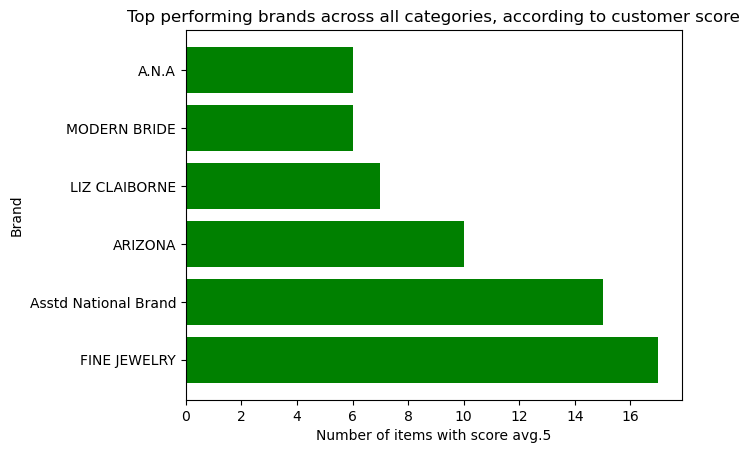

In [337]:
# bar plot showing the brands which have more than 5 items scoring average 5 on customer score. - IE top perfoming brands across all 
# cateogies according to customer score
plt.barh(barplot['brand'],barplot['num_items'], color='Green')
plt.ylabel('Brand')
plt.xlabel('Number of items with score avg.5')
plt.title('Top performing brands across all categories, according to customer score')
plt.show()

Drill down to show items in each brand? pie chart that brings up drop down list when hover?

In [72]:
sorted_top5 = top_5_brands.sort_values(by='brand')
print("row, column:", sorted_top5.shape)
display(sorted_top5.head())

row, column: (61, 3)


,name_title,brand,Overall_Av_Score
4140,a.n.a® Long-Sleeve Stud Jewel Shoulder Sweater...,A.N.A,5.0
4134,a.n.a® Long-Sleeve Fairisle Cardigan - Tall,A.N.A,5.0
4133,a.n.a® Long-Sleeve Drop-Shoulder T-Shirt - Plus,A.N.A,5.0
4106,a.n.a® Draped Bandeau One-Piece Swimdress,A.N.A,5.0
4101,a.n.a® Crochet Shorts,A.N.A,5.0


In [73]:
ANA = sorted_top5[sorted_top5['brand']=='MODERN BRIDE']
display(ANA)

,name_title,brand,Overall_Av_Score
8,1 CT. T.W. Diamond Ring 10K White Gold,MODERN BRIDE,5.0
11,1/2 CT. T.W. Black & White Diamond Ring Sterli...,MODERN BRIDE,5.0
1562,I Said Yes™ 3/8 CT. T.W. Diamond & Lab-Created...,MODERN BRIDE,5.0
2253,Love Lives Forever™ 1/5 CT. T.W. Diamond Ring,MODERN BRIDE,5.0
14,1/2 CT. T.W. Diamond Bridal Ring 10K Gold,MODERN BRIDE,5.0
2,1 CT. T.W. Certified Diamond 14K White Gold Pr...,MODERN BRIDE,5.0


In [ ]:
# now create visual to display this information and discuss insights it can provide. Do you create one bar chart showing most popular 5/5 brands
# then second visual drilling down into the items in each?
# ANA = 6 items; ARIZONA =10; 

In [ ]:
# ?maybe take example sample from across categories? Or brands with most items? display as top named items within brands - could then suggest company could check written reviews to assess reasons for success?

# Insight 3: relationship between age category and online user?

In [342]:
users_csvready.head()

,Username,DOB,State,DOB_Year,State_abbr
0,bkpn1412,1983-07-31,Oregon,1983,OR
1,gqjs4414,1998-07-27,Massachusetts,1998,MA
2,eehe1434,1950-08-08,Idaho,1950,ID
3,hkxj1334,1969-08-03,Florida,1969,FL
4,jjbd1412,2001-07-26,Georgia,2001,GA


In [343]:
# group username by DOB_Year; based on assumption that everyone with a 'username' has an online account.
users_by_year = users_csvready.groupby('DOB_Year')['Username'].count().reset_index(name='User Count')
display(users_by_year.head())
# range 1950-2001

,DOB_Year,User Count
0,1950,99
1,1951,95
2,1952,103
3,1953,112
4,1954,79


In [344]:
#violin plot?
import seaborn as sns

In [355]:
#group into 20 year age categories
dob_years = users_by_year['DOB_Year']
Age_categories = pd.DataFrame({'DOB': dob_years})
current_year = 2025
Age_categories['Age'] = current_year - Age_categories['DOB']

bins = [16,25,66,80] #age ranges - confirm correct in below labelling
labels = ['Young Adult:16-24', 'Adult:25-65', 'Senior:66-80'] # corresponding labels
# pd.cut 
#categorise ages
Age_categories['AgeGroup'] = pd.cut(Age_categories['Age'], bins=bins, labels=labels, right=False)

print(Age_categories.head())

    DOB  Age      AgeGroup
0  1950   75  Senior:66-80
1  1951   74  Senior:66-80
2  1952   73  Senior:66-80
3  1953   72  Senior:66-80
4  1954   71  Senior:66-80


In [356]:
hist1 = Age_categories.groupby('AgeGroup')['Age'].count().reset_index(name='Users_per_cat')
display(hist1.head())

C:\Users\errai\AppData\Local\Temp\ipykernel_17152\3662092542.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,AgeGroup,Users_per_cat
0,Young Adult:16-24,1
1,Adult:25-65,41
2,Senior:66-80,10


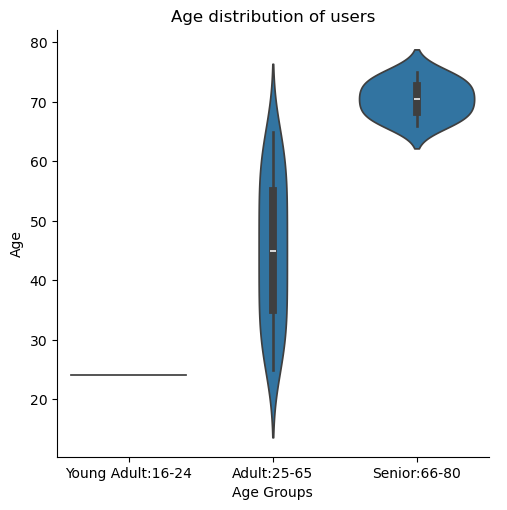

In [357]:
# shows density of customers in each age category - age category 'Adult' over represented - target 'young adult' and 'senior' - untapped online markets?
sns.catplot(x='AgeGroup', y='Age', kind='violin', split=False, data=Age_categories)
plt.title('Age distribution of users')
plt.xlabel('Age Groups')
plt.ylabel('Age')
plt.show()

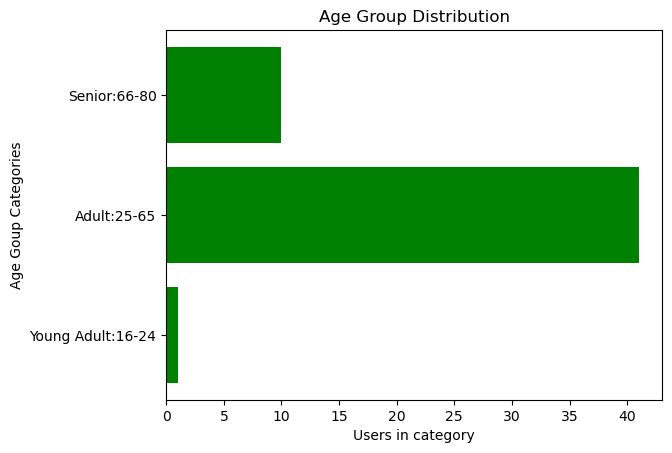

In [358]:
plt.barh(hist1['AgeGroup'],hist1['Users_per_cat'], color='Green')
plt.ylabel('Age Goup Categories')
plt.xlabel('Users in category')
plt.title('Age Group Distribution')
plt.show()

# Insight 4: do the written reviews shed any light on the lowest scoring products that can be actioned on?

In [359]:
# will use the JSON file JCPenney_products, filter for lowest average product rating with highest volume of reviews (will choose cut off as: )
# for these product reviews, will analyse content of reviews to see if areas highlighted - customer service/quality/delivery etc
jcpenney_prodsready.head()

,uniq_id,sku,name_title,list_price,category,average_product_rating,product_url,product_image_urls,brand,total_number_reviews,Reviews
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,41.09,alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'fsdv4141', 'Review': 'You never hav..."
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,41.09,alfred dunner,3.000,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'tpcu2211', 'Review': 'You never hav..."
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,41.09,view all,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'pcfg3234', 'Review': 'You never hav..."
3,505e6633d81f2cb7400c0cfa0394c427,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,41.09,view all,3.500,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'ngrq4411', 'Review': 'You never hav..."
4,d969a8542122e1331e304b09f81a83f6,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,41.09,view all,3.125,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'nbmi2334', 'Review': 'You never hav..."


In [360]:
# to show the entries with average product rating <2. Picked reviews '<=2' and total reviews '==8' was choosen to get a representative sample as with 
# lowest score to give range of products but higher volume of total reviews as possible to reduce bias as much as possible. selected 8 for total number 
# reviews - highest selection reviews under this filter, will allow quantity of reviews to be know (8x53=424)
rev_2 = jcpenney_prodsready[(jcpenney_prodsready['average_product_rating']<=2) & (jcpenney_prodsready['total_number_reviews']==8)]
print("length:", len(rev_2))
display(rev_2.head())

length: 53


,uniq_id,sku,name_title,list_price,category,average_product_rating,product_url,product_image_urls,brand,total_number_reviews,Reviews
174,0a6cdfcd89839f922e73897eca27cff6,pp5003780369,adidas® 3G Speed Shorts-Big & Tall,33.11,shorts,2.00,http://www.jcpenney.com/adidas-3g-speed-shorts...,http://s7d2.scene7.com/is/image/JCPenney/DP021...,ADIDAS,8,"[{'User': 'efyc1434', 'Review': 'I am glad the..."
643,7e6b55fdb0b7c835c56211dd9f5a52d2,pp5003960429,Glamorise® Soft Shoulder Minimizer Bra - 9835,59.12,sale,2.00,http://www.jcpenney.com/glamorise-soft-shoulde...,http://s7d2.scene7.com/is/image/JCPenney/DP042...,Glamorise,8,"[{'User': 'rjzw1332', 'Review': 'Great fit esp..."
770,74ac0b592d23fa5df47f811087b09b9f,1d70578,Dockers® Easy Khaki Classic-Fit Flat-Front Pants,59.12,view all dockers,2.00,http://www.jcpenney.com/dockers-easy-khaki-cla...,http://s7d2.scene7.com/is/image/JCPenney/DP012...,Dockers,8,"[{'User': 'anfp3234', 'Review': 'These are ver..."
837,2c3d39858ef4212f72f650bada334c16,pp5004220455,Levi’s® 505™ Regular Fit Jeans - Boys 4-7x and...,45.93,boy's pants,1.75,http://www.jcpenney.com/levi-s-505-regular-fit...,http://s7d2.scene7.com/is/image/JCPenney/DP052...,Levi,8,"[{'User': 'ayrp1124', 'Review': 'My twin grand..."
877,ee19af46c413d266173847f8834f4b33,pp5004120181,Biddeford™ Plush Heated Blanket,119.69,blankets & throws,2.00,http://www.jcpenney.com/biddeford-plush-heated...,http://s7d9.scene7.com/is/image/JCPenney/DP031...,Biddeford,8,"[{'User': 'wxqc3114', 'Review': 'The blanket h..."


In [361]:
import json

In [ ]:
# for each unique id - filter for 'Reviews' and display reviews - look for common themes?

In [364]:
product_id_with_reviews = 0 #index of row with data want to access
reviews_column_index = rev_2.columns.get_loc('Reviews') # identify column want to access, rev_2 if prev dataset created on JSON file with filters
reviews_for_product = rev_2.iloc[product_id_with_reviews, reviews_column_index] # iloc goes by index - specified in the two variables
print(f"\nReviews for product '{product_id_with_reviews}':")

for i, review_entry in enumerate(reviews_for_product): # iterate through and provide requested data
    print(f" Review {i+1}:")
    print(f"   User: {review_entry.get('User')}")
    print(f"   Review Text: {review_entry.get('Review')}")
    print("\n")


Reviews for product '0':
 Review 1:
   User: efyc1434
   Review Text: I am glad these shorts were available in big and tall. These shorts are comfortable and true to size. My son loves to wear adidas.


 Review 2:
   User: owpi4221
   Review Text: Great fit and length for comfortable wear and two pockets make it worth the value!


 Review 3:
   User: rsan3231
   Review Text: I bought them for my son. He loves them, I got name brand shorts for clearance too!


 Review 4:
   User: hada2232
   Review Text: Bought these shorts for my husband and he loves them.


 Review 5:
   User: pqsw2144
   Review Text: These shorts Are great For tall guy. My son loved them from minute he tried them on. Not usually one to remark he said  these Are great ,  so I will invest in more in future.


 Review 6:
   User: abca4443
   Review Text: Shorts are true to size. The shorts are sharp looking and comfortable.


 Review 7:
   User: ijaf1234
   Review Text: Our son is five foot nine inches tall, weighs 285

Written reviews do not match low numerical score - find way to present this with code rather than reading; check written reviews for 5/5? - deleted this cell to 'messy notebook' as do not think relevant to final analysis

In [367]:
# filter rev_2 for negative words; understand negative word selection is subjective and have just added common negative words found in reviews, tried to make opposites of positive list
negative_words = ['bad', 'unhappy', 'poor', 'terrible' 'cheap', 'bad value' 'not correct', 'wrong', 'disappointed', 'dislike', 'disliked', 'too small', 'too big', 'hated', 'hate', 'hates' 'upset', 'bad quality', 'uncomfortable', 'below expectations', 'do not recommend' ]
# create empty list to store filtered reviews
negative_reviews = []
#iterate through each product in the DataFrame
for uniq_id, product_data in rev_2.iterrows():
    reviews = product_data.get('Reviews')
    if reviews:
        for review_entry in reviews:
            review_text = review_entry.get('Review', '').lower()
            user = review_entry.get('User', 'Unknown User')
            if any(word in review_text for word in negative_words):
                negative_reviews.append({
                    'uniq_id' : uniq_id,
                    'User' : user,
                    'Review' : review_text,
                    'Matched_Negative_Words' : [word for word in negative_words if word in review_text]
                })
negative_reviews_df = pd.DataFrame(negative_reviews)
print(f"Found {len(negative_reviews_df)} reviews containing negative words.")
display(negative_reviews_df.head())


Found 28 reviews containing negative words.


,uniq_id,User,Review,Matched_Negative_Words
0,1389,fumm1113,"these pants, (in petite cuz in only 51) are pe...",[bad]
1,1389,abof3221,disappointed that these were exactly the same ...,[disappointed]
2,1401,dqnb2343,two years ago i bought my first of this line o...,"[disappointed, too small]"
3,1429,birc1443,i purchased this t-shirt based upon the fabric...,[bad]
4,1801,fnmd4431,although i really like the pattern i chose for...,[disappointed]


In [368]:
# filter rev_2 for positive words - extend this list to match 'negative' list
positive_words = ['good','unhappy', 'good value', 'perfect', 'right', 'perfect fit' 'delighted', 'loved', 'superior', 'comfortable', 'love', 'loves', 'really like', 'highly recommend', 'great quality', 'exceed expectations' ]
# create empty list to store filtered reviews
positive_reviews = []
#iterate through each product in the DataFrame
for uniq_id, product_data in rev_2.iterrows():
    reviews = product_data.get('Reviews')
    if reviews:
        for review_entry in reviews:
            review_text = review_entry.get('Review', '').lower()
            user = review_entry.get('User', 'Unknown User')
            if any(word in review_text for word in positive_words):
                positive_reviews.append({
                    'uniq_id' : uniq_id,
                    'User' : user,
                    'Review' : review_text,
                    'Matched_Positive_Words' : [word for word in positive_words if word in review_text]
                })
positive_reviews_df = pd.DataFrame(positive_reviews)
print(f"Found {len(positive_reviews_df)} reviews containing positive words.")
display(positive_reviews_df.head())

# the insight here is that score/average score numerical does not reflect written review - the company can make data
# collected more valuable if fixes this mismatch between written and numerical reviews. Suggested next steps would be..

# reviews containing positive words

Found 280 reviews containing positive words.


,uniq_id,User,Review,Matched_Positive_Words
0,174,efyc1434,i am glad these shorts were available in big a...,"[comfortable, love, loves]"
1,174,owpi4221,great fit and length for comfortable wear and ...,[comfortable]
2,174,rsan3231,"i bought them for my son. he loves them, i got...","[love, loves]"
3,174,hada2232,bought these shorts for my husband and he love...,"[love, loves]"
4,174,pqsw2144,these shorts are great for tall guy. my son lo...,"[loved, love]"


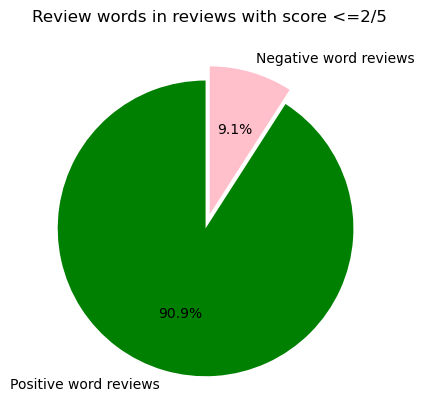

In [369]:
# visual to show comparison of positive & negative words in items with average numerical score below 2/5, with 8 reviews.
# pie chart: positive words = 154 reviews; negative word reviews 15. CANNOT rule out that there are reviews with neg & pos words - flaw of this analysis 
# would fix by..
# insight - true reflection of positive and negative/negative less likely to leave written review?
import matplotlib.pyplot as plt
labels = ['Positive word reviews', 'Negative word reviews']
sizes = [280, 28]
colors = ['green', 'pink']
explode = (0.1, 0)

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=90)
plt.title('Review words in reviews with score <=2/5')
plt.show()



insight here - had looked for reviews to see if shed light on reasons for low numerical score to guide company addressing problems - 
instead found little to no correlation between low numerical score and written review (filtered for positive & negative words) - 
insight is highlighted issue with reviews and not making the most of data available for collection. On larger scale - would next run sentinent analysis
on all reviews to extrapolate this finding and confirm its existence.
on website - link to customer reviews per item?
what does window asking for feedback/review look like?


In [ ]:
# N.B. when adding comments make sure to identify when have eg 'joined', 'aggregated' etc key words